In [34]:
import os
import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# [TBC] complete your code here with proper comments
# suppress all warnings
warnings.filterwarnings("ignore")

In [36]:
data = pd.read_csv('C:\\Users\\thiba\\Downloads\\red_cross_supply_chain_dataset.csv')
data.head()

,Sourcing,Transport,Replenishment,Distribution,Total demand,Initial RW Inv,Initial PW Inv,Initial DW Inv Total,Initial DW Inv 0,Initial DW Inv 1,...,Demand coverage after 480 hours (%),Demand coverage after 492 hours (%),Demand coverage after 504 hours (%),Demand coverage after 516 hours (%),Demand coverage after 528 hours (%),Demand coverage after 540 hours (%),Demand coverage after 552 hours (%),Demand coverage after 564 hours (%),Demand coverage after 576 hours (%),Readiness (%)
0,0,0,1,0,17497.0,2724.0,156.0,120.0,1.0,13.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.505439
1,0,0,1,0,20365.0,2237.0,431.0,332.0,32.0,2.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.125215
2,0,0,1,0,23393.0,2332.0,377.0,291.0,7.0,1.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.340390
3,0,0,1,0,25825.0,2167.0,252.0,581.0,7.0,31.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.935140
4,0,0,1,0,23179.0,2357.0,91.0,552.0,7.0,7.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.258119


In [37]:
data.drop(columns='Readiness (%)').head()

,Sourcing,Transport,Replenishment,Distribution,Total demand,Initial RW Inv,Initial PW Inv,Initial DW Inv Total,Initial DW Inv 0,Initial DW Inv 1,...,Demand coverage after 468 hours (%),Demand coverage after 480 hours (%),Demand coverage after 492 hours (%),Demand coverage after 504 hours (%),Demand coverage after 516 hours (%),Demand coverage after 528 hours (%),Demand coverage after 540 hours (%),Demand coverage after 552 hours (%),Demand coverage after 564 hours (%),Demand coverage after 576 hours (%)
0,0,0,1,0,17497.0,2724.0,156.0,120.0,1.0,13.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0,0,1,0,20365.0,2237.0,431.0,332.0,32.0,2.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0,0,1,0,23393.0,2332.0,377.0,291.0,7.0,1.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0,0,1,0,25825.0,2167.0,252.0,581.0,7.0,31.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0,0,1,0,23179.0,2357.0,91.0,552.0,7.0,7.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [38]:
column_list = ['Demand coverage after 132 hours (%)',
 'Demand coverage after 144 hours (%)',
 'Demand coverage after 156 hours (%)',
 'Demand coverage after 168 hours (%)',
 'Demand coverage after 180 hours (%)',
 'Demand coverage after 192 hours (%)',
 'Demand coverage after 204 hours (%)',
 'Demand coverage after 216 hours (%)',
 'Demand coverage after 228 hours (%)',
 'Demand coverage after 240 hours (%)',
 'Demand coverage after 252 hours (%)',
 'Demand coverage after 264 hours (%)',
 'Demand coverage after 276 hours (%)',
 'Demand coverage after 288 hours (%)',
 'Demand coverage after 300 hours (%)',
 'Demand coverage after 312 hours (%)',
 'Demand coverage after 324 hours (%)',
 'Demand coverage after 336 hours (%)',
 'Demand coverage after 348 hours (%)',
 'Demand coverage after 360 hours (%)',
 'Demand coverage after 372 hours (%)',
 'Demand coverage after 384 hours (%)',
 'Demand coverage after 396 hours (%)',
 'Demand coverage after 408 hours (%)',
 'Demand coverage after 420 hours (%)',
 'Demand coverage after 432 hours (%)',
 'Demand coverage after 444 hours (%)',
 'Demand coverage after 456 hours (%)',
 'Demand coverage after 468 hours (%)',
 'Demand coverage after 480 hours (%)',
 'Demand coverage after 492 hours (%)',
 'Demand coverage after 504 hours (%)',
 'Demand coverage after 516 hours (%)',
 'Demand coverage after 528 hours (%)',
 'Demand coverage after 540 hours (%)',
 'Demand coverage after 552 hours (%)',
 'Demand coverage after 564 hours (%)',
 'Demand coverage after 576 hours (%)']

In [39]:
feature = data.drop(columns=column_list)

In [40]:
# Drop columns that are not in the list of columns to keep
columns_to_drop = [col for col in data.columns if col not in column_list]
label = data.drop(columns=columns_to_drop)

In [41]:
data.info

<bound method DataFrame.info of        Sourcing  Transport  Replenishment  Distribution  Total demand  \
0             0          0              1             0       17497.0   
1             0          0              1             0       20365.0   
2             0          0              1             0       23393.0   
3             0          0              1             0       25825.0   
4             0          0              1             0       23179.0   
...         ...        ...            ...           ...           ...   
11995         1          1              0             1       22100.0   
11996         1          1              0             1       19185.0   
11997         1          1              0             1       21936.0   
11998         1          1              0             1       31348.0   
11999         1          1              0             1       14102.0   

       Initial RW Inv  Initial PW Inv  Initial DW Inv Total  Initial DW Inv 0  \
0         

In [42]:
# feature scaling
scaler = MinMaxScaler()
scaled_feature = scaler.fit_transform(feature)

In [43]:
# Split the dataset into train, validation, and test sets
train_val_feature, test_feature, train_val_label, test_label = train_test_split(
    scaled_feature, label.to_numpy(), test_size = 0.2, random_state = 0
)
train_feature, val_feature, train_label, val_label = train_test_split(
    train_val_feature, train_val_label, test_size = 0.25, random_state = 0
)

In [44]:
# specify the type of data stored in the tensors to avoid incompatiblity
# create the train, validatoin, and test dataset
# specify the type of data stored in the tensors to avoid incompatiblity
train_ds = TensorDataset(
    torch.tensor(train_feature.reshape(-1, 1, 35), dtype = torch.float32),
    torch.tensor(train_label, dtype = torch.float32)
)
val_ds = TensorDataset(
    torch.tensor(val_feature.reshape(-1, 1, 35), dtype = torch.float32),
    torch.tensor(val_label, dtype = torch.float32)
)
test_ds = TensorDataset(
    torch.tensor(test_feature.reshape(-1, 1, 35), dtype = torch.float32),
    torch.tensor(test_label, dtype = torch.float32)
)

In [45]:
# create the train and test data loaders
batch_size = 256 # usually set to 2 to the nth power
train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
val_dl = DataLoader(val_ds, batch_size = batch_size, shuffle = False)
test_dl = DataLoader(test_ds, batch_size = batch_size, shuffle = False)

In [46]:
# display the dimensionality of a batch
for (X, y) in val_dl:
    print('Feature shape:', X.shape)
    print('Label shape:', y.shape)
    break

Feature shape: torch.Size([256, 1, 35])
Label shape: torch.Size([256, 38])


In [53]:
# define a custom neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, in_channels, n_labels):
        super().__init__()
        self.net = nn.Sequential(
            nn.LazyConv1d(out_channels = 3, kernel_size = 3, stride = 1, padding = 1),
            nn.LazyBatchNorm1d(), nn.Sigmoid(), nn.MaxPool1d(kernel_size = 2),
            nn.LazyConv1d(out_channels = 9, kernel_size = 3, stride = 1, padding = 1),
            nn.LazyBatchNorm1d(), nn.Sigmoid(), nn.MaxPool1d(kernel_size = 2),
            nn.LazyConv1d(out_channels = 27, kernel_size = 3, stride = 1, padding = 1),
            nn.LazyBatchNorm1d(), nn.Sigmoid(), nn.MaxPool1d(kernel_size = 2),
            nn.Flatten(),
            nn.LazyLinear(1000), nn.LazyBatchNorm1d(), nn.ReLU(), nn.Dropout(p = 0.5),
            nn.LazyLinear(100), nn.LazyBatchNorm1d(), nn.ReLU(), nn.Dropout(p = 0.5),
            nn.LazyLinear(38)
        )

    def forward(self, x):
        return self.net(x)

In [54]:
# get cpu, gpu or mps device for computation
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [55]:
# create the neural network
model = NeuralNetwork(
    in_channels = train_ds[0][0].shape[0],
    n_labels = 38
).to(device)

In [56]:
# define the training function
def train(train_dl, val_dl, model, loss_fn, optimizer, epochs, early_stopping_patience, lr_scheduler):
    # initialization
    min_val_loss, patience_counter = np.inf, 0
    saved_path, start_time = '', datetime.datetime.now()
    # aggregate loss histories into a dictionary
    histories = {'train_batch': [], 'train_epoch': [], 'val_batch': [], 'val_epoch': []}

    for epoch in range(epochs):
        # train
        model.train()
        train_epoch_loss = 0.0
        for X, y in train_dl:
            X, y = X.to(device), y.to(device) # move data to GPU
            optimizer.zero_grad()
            train_batch_loss = loss_fn(model(X), y)
            train_batch_loss.backward()
            optimizer.step()
            train_epoch_loss += train_batch_loss.item()
            histories['train_batch'].append(train_batch_loss.item())
        train_epoch_loss /= len(train_dl)
        histories['train_epoch'].append(train_epoch_loss)

        # validation
        model.eval()
        val_epoch_loss = 0.0
        with torch.no_grad():
            for X, y in val_dl:
                X, y = X.to(device), y.to(device) # move data to GPU
                val_batch_loss = loss_fn(model(X), y)
                val_epoch_loss += val_batch_loss.item()
                histories['val_batch'].append(val_batch_loss.item())
            val_epoch_loss /= len(val_dl)
            histories['val_epoch'].append(val_epoch_loss)

        # print log
        end_time = datetime.datetime.now()
        time_consumed = str(end_time - start_time).split('.')[0]
        print(f"Epoch {epoch + 1}: train loss = {train_epoch_loss:>5f}, val loss = {val_epoch_loss:>5f}, time consumed = {time_consumed}")

        # learning rate decay
        current_lr = optimizer.param_groups[0]['lr']
        lr_scheduler.step(val_epoch_loss)
        if current_lr != optimizer.param_groups[0]['lr']:
            print(f'Learning rate reduced after epoch {epoch+1}')

        # early stopping
        if val_epoch_loss < min_val_loss:
            min_val_loss, patience_counter = val_epoch_loss, 0
            # save the current model as a new minimal validation loss is achieved
            if os.path.exists(saved_path):
                os.remove(saved_path)
            time_str = end_time.strftime("%Y-%m-%d_%H-%M-%S")
            saved_path = f'epoch_{epoch+1}_val_loss_{val_epoch_loss:>4f}_{time_str}.pth'
            torch.save(model.state_dict(), saved_path)
            print(f'Model saved after epoch {epoch+1}')
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print('Early stopping!')
                break
                
    return histories, saved_path

In [57]:
# define the training hyper-parameters
loss_fn = nn.MSELoss()
learning_rate = 1e-1
weight_decay = 1e-5
optimizer = torch.optim.Adam(
    model.parameters(),
    lr = learning_rate,
    weight_decay = weight_decay
)
epochs = 1000
early_stopping_patience = 20
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode = 'min',
    factor = 0.1,
    patience = 10
)

In [58]:
# train the neural network
histories, saved_path = train(
    train_dl,
    val_dl,
    model,
    loss_fn,
    optimizer,
    epochs,
    early_stopping_patience,
    lr_scheduler
)
# reload the best model
model.load_state_dict(torch.load(saved_path))

Epoch 1: train loss = 1348.788956, val loss = 467.737000, time consumed = 0:00:01
Model saved after epoch 1
Epoch 2: train loss = 379.942870, val loss = 544.233237, time consumed = 0:00:01
Epoch 3: train loss = 248.694820, val loss = 395.191272, time consumed = 0:00:02
Model saved after epoch 3
Epoch 4: train loss = 175.624852, val loss = 178.732254, time consumed = 0:00:02
Model saved after epoch 4
Epoch 5: train loss = 170.355577, val loss = 70.972615, time consumed = 0:00:03
Model saved after epoch 5
Epoch 6: train loss = 154.905817, val loss = 93.567956, time consumed = 0:00:04
Epoch 7: train loss = 146.693782, val loss = 87.836433, time consumed = 0:00:04
Epoch 8: train loss = 141.970067, val loss = 96.505737, time consumed = 0:00:05
Epoch 9: train loss = 148.379707, val loss = 48.626300, time consumed = 0:00:05
Model saved after epoch 9
Epoch 10: train loss = 147.177122, val loss = 83.263924, time consumed = 0:00:06
Epoch 11: train loss = 135.135692, val loss = 232.471600, time c

<All keys matched successfully>

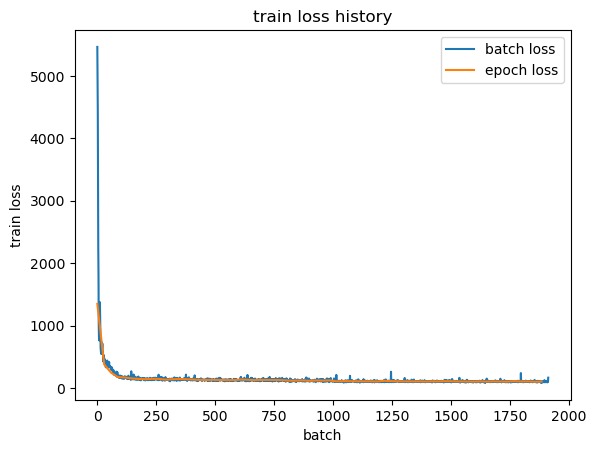

In [59]:
# plot the train loss history
plt.figure()
batch = np.arange(len(histories['train_batch']))
epoch = np.arange(len(histories['train_epoch']))
batches_per_epoch = (int(len(train_ds) / batch_size + 1))
plt.plot(batch, histories['train_batch'], '-', label = 'batch loss')
plt.plot(epoch * batches_per_epoch, histories['train_epoch'], '-', label = 'epoch loss')
plt.title('train loss history')
plt.xlabel('batch')
plt.ylabel('train loss')
plt.legend()
plt.show()

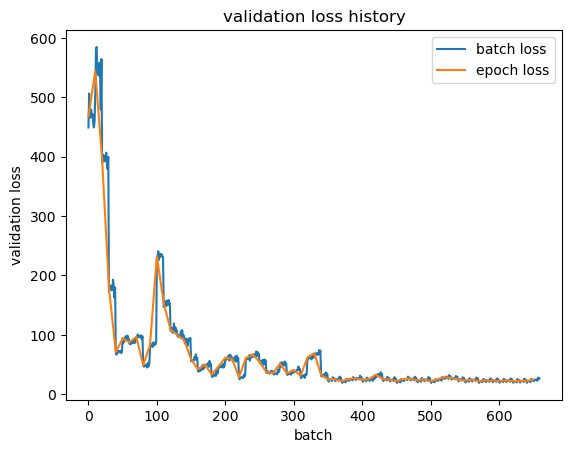

In [60]:
# plot the train loss history
plt.figure()
batch = np.arange(len(histories['val_batch']))
epoch = np.arange(len(histories['val_epoch']))
batches_per_epoch = (int(len(val_ds) / batch_size + 1))
plt.plot(batch, histories['val_batch'], '-', label = 'batch loss')
plt.plot(epoch * batches_per_epoch, histories['val_epoch'], '-', label = 'epoch loss')
plt.title('validation loss history')
plt.xlabel('batch')
plt.ylabel('validation loss')
plt.legend()
plt.show()

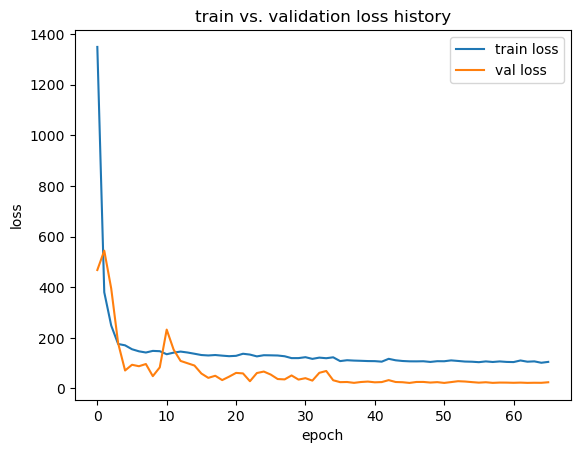

In [61]:
# plot the train vs. val loss history
plt.figure()
plt.plot(np.arange(len(histories['train_epoch'])), histories['train_epoch'], '-', label = 'train loss')
plt.plot(np.arange(len(histories['val_epoch'])), histories['val_epoch'], '-', label = 'val loss')
plt.title('train vs. validation loss history')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [62]:
# define a function to make predictions on test dataset and evaluate the performance
def test(dataloader, model, loss_fn):
    logits, probs, preds = [], [], []
    with torch.no_grad():
        loss = 0.0
        for (X, y) in dataloader:
            X, y = X.to(device), y.to(device) # move data to GPU
            batch_logits = model(X)
            batch_loss = loss_fn(batch_logits, y)
            loss += batch_loss.item()

            batch_probs = torch.softmax(batch_logits, dim = -1)
            _, batch_preds = torch.max(batch_logits, 1)

            logits.append(batch_logits.cpu().numpy())
            probs.append(batch_probs.cpu().numpy())
            preds.append(batch_preds.cpu().numpy())
        loss /= len(dataloader)
        print(f"test loss = {loss}")
    return np.concatenate(logits), np.concatenate(probs), np.concatenate(preds), loss

In [63]:
# make prediction on test set and evaluate the performance
test_logits, test_prob, test_pred, test_loss = test(test_dl, model, loss_fn)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_label, test_logits))

# Calculate R-squared (r2)
r2 = r2_score(test_label, test_logits)

print(f"RMSE = {rmse}") # print RMSE
print(f"R-squared = {r2}") # print R-squared

test loss = 21.83284435272217
RMSE = 4.670460534727273
R-squared = 0.9681913434586891
